In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from random import *
import statistics
import pandas as pd
import math
import imageio

X = scipy.io.loadmat('VORTALL.mat')
data=X['VORTALL']
a = 199 #width 
b = 449 #height

In [2]:
n=data.shape[1]
clib=[]
lib=[]

for i in range(n):
    v= np.copy(np.real(np.reshape(data[:,i],(b,a))))
    coarse=np.resize(v,(22,9))
    clib=np.reshape(coarse,(198)).T
    lib.append(clib)

lib=np.reshape(lib,(198,151))

In [3]:
def plotFlow(X,b,a):    
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(X,(b,a))))
    V2 = V2.T
    minval = np.min(V2)
    maxval = np.max(V2)

    
    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    
    plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)
    plt.scatter(49*b/449,99*a/199,5000,color='k') # draw cylinder

In [4]:
def createMovie(X,b,a):
    plt.rcParams['figure.figsize'] = [8, 8]
    filenames = []
    for i in range(150):
        plotFlow(X[:,i],b,a)
        filename = filename = '/Users/talukdarraianferdous/Documents/Fall 2022/Math - Data Driven Science/full'+str(i)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()
    with imageio.get_writer('vortices.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

In [5]:
#Original flow field movie
createMovie(data,449,199)

In [6]:
#movie in new coordinates
createMovie(lib,22,9)

Text(0.5, 1.0, 'Reconstructed flow of column=99')

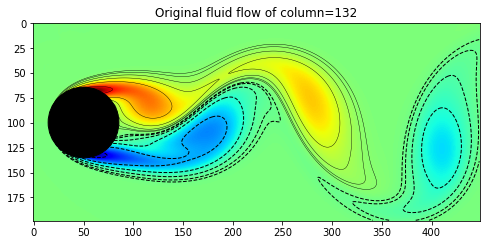

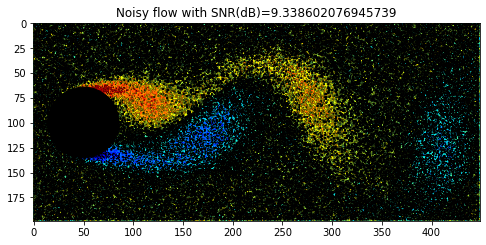

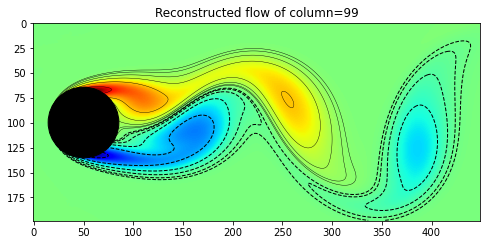

In [7]:
#Add noise to a column, downsampling
cp=randint(0,150)
data1=data[:,cp]
noise=np.random.randn(data1.shape[0])
datan=data1+noise
snr1=math.log(np.mean(data1**2/noise**2));

c2=[]
lib2=[]
std=[]

v2=np.copy(np.real(np.reshape(datan,(b,a)))) #noisy flow fuild
coarse2=np.resize(v2,(22,9))
c2=np.reshape(coarse,(198)).T

for i in range(150):
    e= np.linalg.norm(lib[:,i]-c2)/np.linalg.norm(lib[:,i])
    std.append(e)

idx=pd.Series(std).idxmin()
recons_estimate=data[:,idx]


vr= np.copy(np.real(np.reshape(data[:,idx],(b,a))))  #reconstructed flow field
v0=np.copy(np.real(np.reshape(data1,(b,a))))  #original flow fluid

plt.figure()
plotFlow(v0,449,199)
plt.title('Original fluid flow of column='+str(cp))
plt.figure()
plotFlow(v2,449,199)
plt.title('Noisy flow with SNR(dB)='+str(snr1))
plt.figure()
plotFlow(vr,449,199)
plt.title('Reconstructed flow of column='+str(idx))


Text(0.5, 1.0, 'Reconstructed flow of column=23')

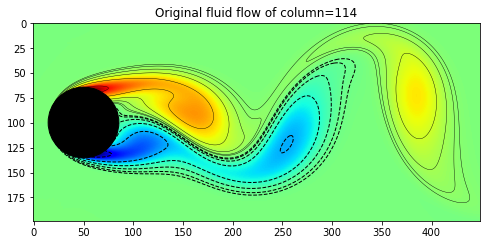

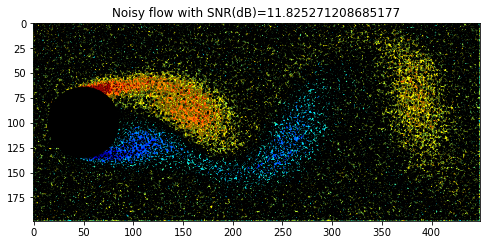

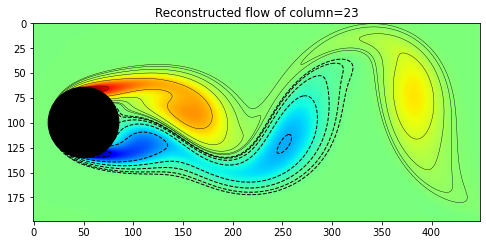

In [8]:
from random import *
import statistics
import pandas as pd
import math
from scipy.optimize import minimize

cp=randint(0,150)
data1=data[:,cp]
noise=np.random.randn(data1.shape[0])
datan=data1+noise
snr1=math.log(np.mean(data1**2/noise**2));

c2=[]
lib2=[]
std=[]

v2=np.copy(np.real(np.reshape(datan,(b,a)))) #noisy flow fuild
coarse2=np.resize(v2,(22,9))
c2=np.reshape(coarse,(198)).T

def L1_norm(x):
    return np.linalg.norm(x,ord=1)
    
constr = ({'type': 'ineq', 'fun': lambda x: np.linalg.norm(lib @ x - c2,ord=2)})
x0 = np.linalg.pinv(lib) @ c2# initialize with L2 solution
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s1 = res.x
std.append(s1)

idx=pd.Series(s1).idxmax()
recons_estimate=data[:,idx]


vr= np.copy(np.real(np.reshape(data[:,idx],(b,a))))  #reconstructed flow field
v0=np.copy(np.real(np.reshape(data1,(b,a))))  #original flow fluid


plt.figure()
plotFlow(v0,449,199)
plt.title('Original fluid flow of column='+str(cp))
plt.figure()
plotFlow(v2,449,199)
plt.title('Noisy flow with SNR(dB)='+str(snr1))
plt.figure()
plotFlow(vr,449,199)
plt.title('Reconstructed flow of column='+str(idx))


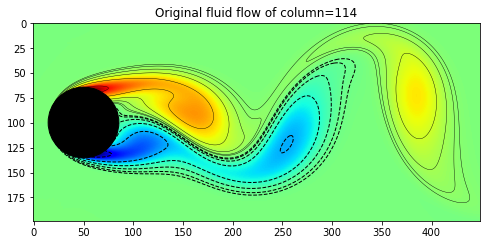

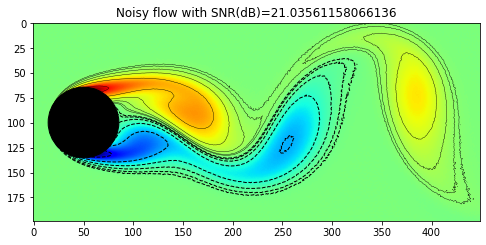

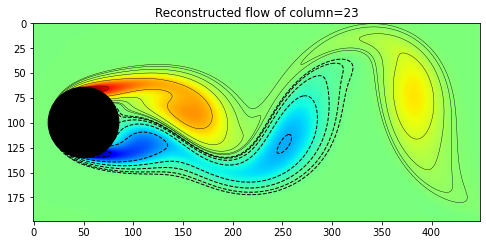

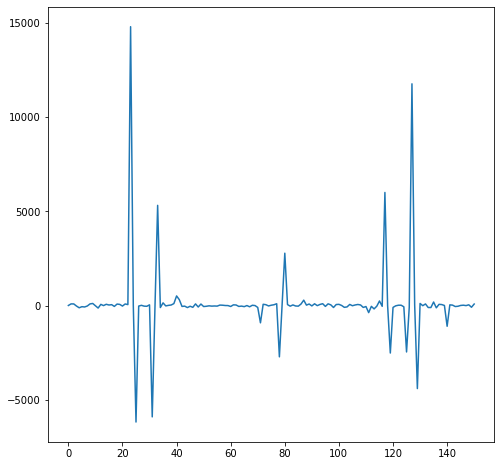

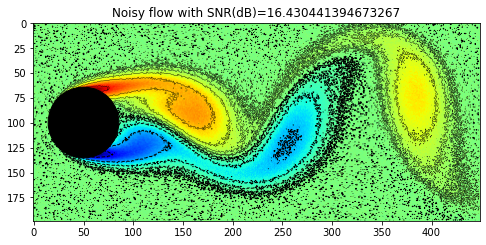

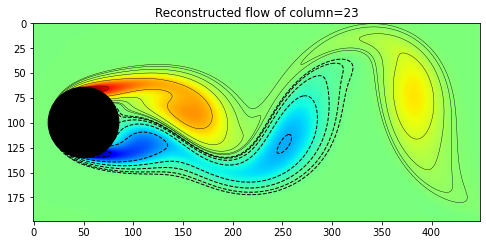

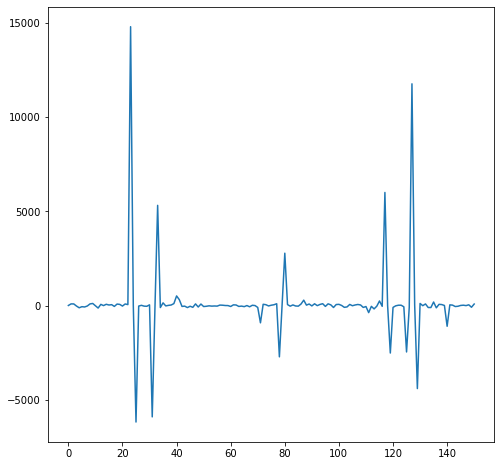

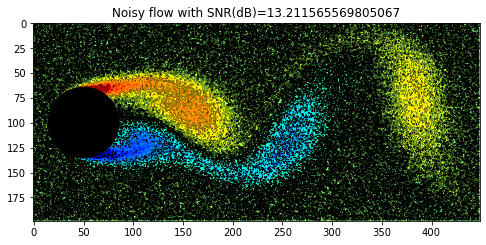

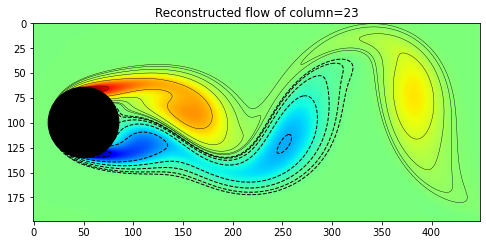

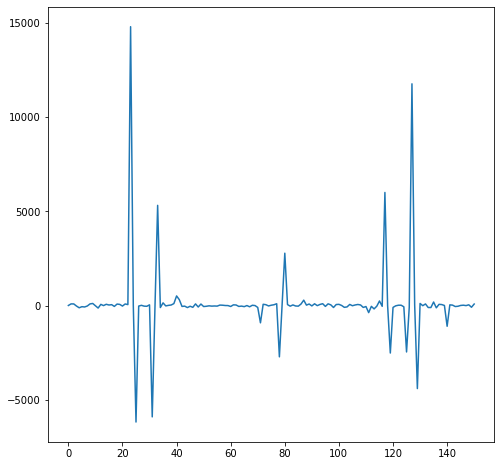

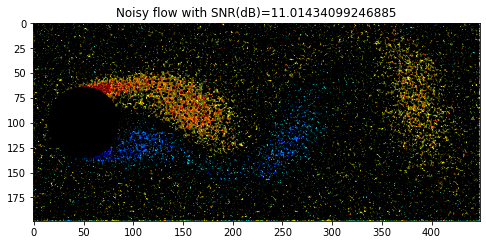

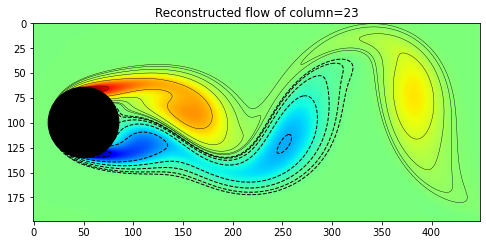

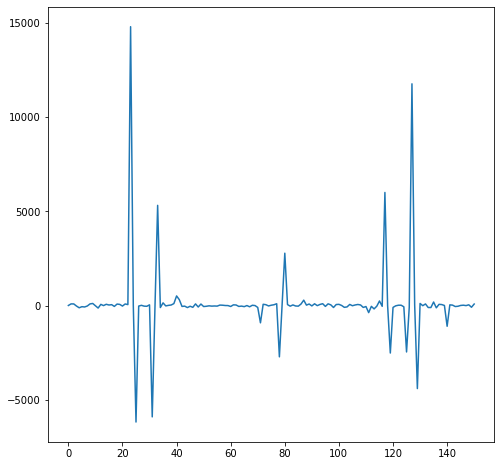

In [9]:
#with different noise
plt.figure()
plotFlow(v0,449,199)
plt.title('Original fluid flow of column='+str(cp))


for k in [0.01, 0.1, 0.5, 1.5]:
    datan=data1+(k*noise)
    snr1=math.log(np.mean(data1**2/(k*noise)**2));
    c2=[]
    lib2=[]
    avg=[]
    v2=np.copy(np.real(np.reshape(datan,(b,a)))) #noisy flow fuild
    coarse2=np.resize(v2,(22,9))
    c2=np.reshape(coarse,(198)).T
    
    constr = ({'type': 'ineq', 'fun': lambda x: np.linalg.norm(lib @ x - c2,ord=2)})
    x0 = np.linalg.pinv(lib) @ c2# initialize with L2 solution
    res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
    s1 = res.x
  
    idx=pd.Series(s1).idxmax()
    recons_estimate=data[:,idx]
  
    vr= np.copy(np.real(np.reshape(data[:,idx],(b,a))))  #reconstructed flow field
  
    plt.figure()
    plotFlow(v2,449,199)
    plt.title('Noisy flow with SNR(dB)='+str(snr1))
    plt.figure()
    plotFlow(vr,449,199)
    plt.title('Reconstructed flow of column='+str(idx))
    plt.figure()
    plt.plot(s1)


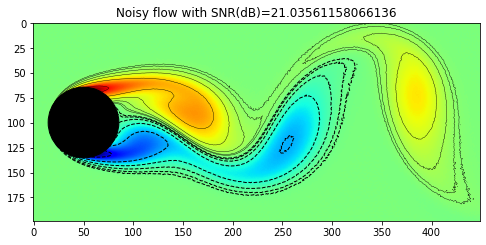

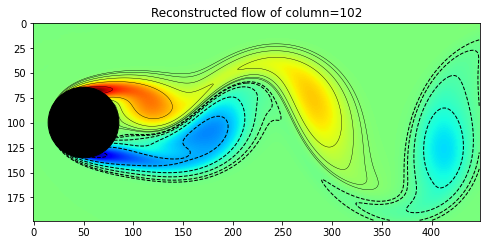

In [10]:
for k in [0.01]:
    datan=data1+k*noise
    snr1=math.log(np.mean(data1**2/(k*noise)**2));
    c2=[]
    lib2=[]
    average=[]
    v2=np.copy(np.real(np.reshape(datan,(b,a)))) #noisy flow fuild
    coarse2=np.resize(v2,(22,9))
    c2=np.reshape(coarse,(198)).T
  
    for i in range(150):
            e= np.linalg.norm(lib[:,i]-c2,ord=1)/np.linalg.norm(lib[:,i],ord=1)
            average.append(e)
    
    idx=pd.Series(average).idxmin()
    recons_estimate=data[:,idx]
  
    vr= np.copy(np.real(np.reshape(data[:,idx],(b,a))))  #reconstructed flow field
  
    plt.figure()
    plotFlow(v2,449,199)
    plt.title('Noisy flow with SNR(dB)='+str(snr1))
    plt.figure()
    plotFlow(vr,449,199)
    plt.title('Reconstructed flow of column='+str(idx))


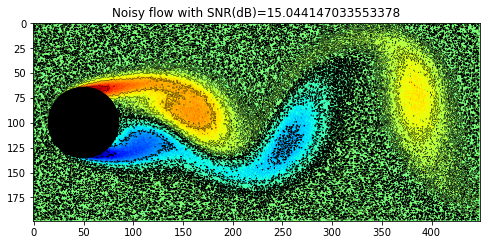

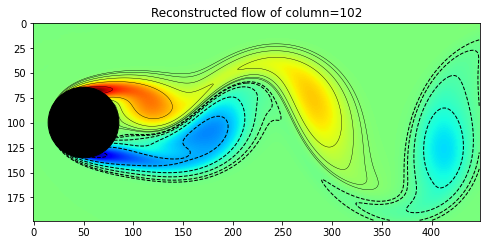

In [11]:
for k in [0.2]:
    datan=data1+k*noise
    snr1=math.log(np.mean(data1**2/(k*noise)**2));
    c2=[]
    lib2=[]
    average=[]
    v2=np.copy(np.real(np.reshape(datan,(b,a)))) #noisy flow fuild
    coarse2=np.resize(v2,(22,9))
    c2=np.reshape(coarse,(198)).T
  
    for i in range(150):
            e= np.linalg.norm(lib[:,i]-c2,ord=1)/np.linalg.norm(lib[:,i],ord=1)
            average.append(e)
    
    idx=pd.Series(average).idxmin()
    recons_estimate=data[:,idx]
  
    vr= np.copy(np.real(np.reshape(data[:,idx],(b,a))))  #reconstructed flow field
  
    plt.figure()
    plotFlow(v2,449,199)
    plt.title('Noisy flow with SNR(dB)='+str(snr1))
    plt.figure()
    plotFlow(vr,449,199)
    plt.title('Reconstructed flow of column='+str(idx))

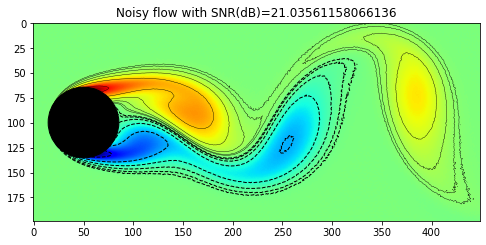

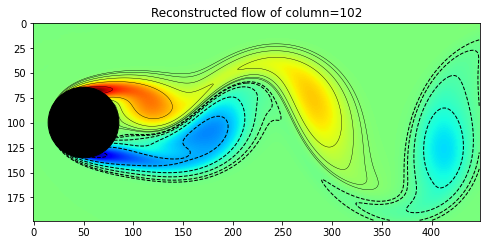

In [12]:
for k in [0.01]:
    datan=data1+k*noise
    snr1=math.log(np.mean(data1**2/(k*noise)**2));
    c2=[]
    lib2=[]
    average=[]
    v2=np.copy(np.real(np.reshape(datan,(b,a)))) #noisy flow fuild
    coarse2=np.resize(v2,(22,9))
    c2=np.reshape(coarse,(198)).T
  
    for i in range(150):
        e= np.linalg.norm(lib[:,i]-c2,ord=1)/np.linalg.norm(lib[:,i],ord=1)
        average.append(e)
    
    idx=pd.Series(average).idxmin()
    recons_estimate=data[:,idx]
  
    vr= np.copy(np.real(np.reshape(data[:,idx],(b,a))))  #reconstructed flow field
  
    plt.figure()
    plotFlow(v2,449,199)
    plt.title('Noisy flow with SNR(dB)='+str(snr1))
    plt.figure()
    plotFlow(vr,449,199)
    plt.title('Reconstructed flow of column='+str(idx))
